# Plot for supplementary figure 6
Plot performance comparison of the following models:

- AdaBoost
- NextFlu
- AdaBoost (NextFlu matched params)
- RF
- XGBoost
- MLP
- ResNet

**Note**: Run this notebook after running notebooks "Fig2_model_evaluation", "SuppFig6_part2_comparison_testScores", and "SuppFig6_part2_NextFlu_testScores".

## Imports and configuration for plotting

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_context(rc={"axes.labelsize":9,
                    "xtick.labelsize":8,
                    "ytick.labelsize":8,
                    "legend.fontsize":8,
                    "legend.title_fontsize":8})

## Read test scores and prepare data for plots

In [2]:
# test scores of the proposed model
scores_ourModel = pd.read_csv("../results/Fig2_model_evaluation/Fig2_performance_testScores.csv")
scores_ourModel = scores_ourModel[['season', 'MAE']]
scores_ourModel['model'] = "AdaBoost"

# test scores of other models
scores_models = pd.read_csv("../results/SuppFig6_comparison/SuppFig6_testScores.csv")
scores_models = scores_models[['model', 'season', 'MAE']]

# renaming for AdaBoost (NextFlu-matched-params) model
ind = (scores_models.model == "AdaBoost_binary")
scores_models.loc[ind, 'model'] = "AdaBoost\n(NextFlu-matched-params)"


'''
Combine results and melt
'''
# combine results
scores = pd.concat((scores_ourModel, scores_models), ignore_index=True)

# melt by variable MAE
scores = scores.melt(id_vars=['model', 'season'], var_name=['MAE'])

# remove average MAE
scores = scores[scores.season != 'Average']

## Plot MAE of models over boxplot varying over 14 test seasons

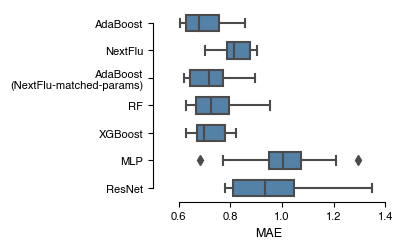

In [8]:
fig, ax = plt.subplots(figsize=(3,2.5))

sns.boxplot(x='value', y='model', data=scores,
            order=['AdaBoost', 'NextFlu', 'AdaBoost\n(NextFlu-matched-params)','RF', 'XGBoost','MLP', 'ResNet'],
            color = 'steelblue',
            width=0.6,
            ax=ax)

# configurations for figure
ax.set_xlim(left=0.5, right=1.4)
ax.set_xlabel("MAE", fontsize=9)
ax.set_ylabel("")

sns.despine(trim=True)

# save figure
fig_fn = '../results/SuppFig6_comparison/SuppFig6_performance_comparison.svg'
fig.savefig(fig_fn, format='svg', bbox_inches='tight')

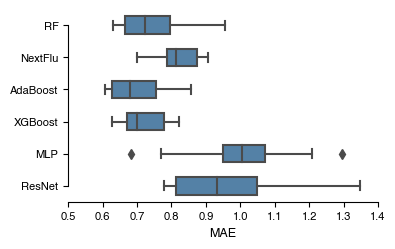

In [14]:
fig, ax = plt.subplots(figsize=(4,2.5))

sns.boxplot(x='value', y='model', data=scores,
            order=['RF', 'NextFlu', 'AdaBoost', 'XGBoost','MLP', 'ResNet'],
            color = 'steelblue',
            width=0.55,
            ax=ax)

# configurations for figure
ax.set_xlim(left=0.5, right=1.4)
ax.set_xlabel("MAE", fontsize=9)
ax.set_ylabel("")

sns.despine(trim=True)

# save figure
fig_fn = '../results/SuppFig6_comparison/comparison_presentation.svg'
fig.savefig(fig_fn, format='svg', bbox_inches='tight')